In [2]:
import pandas as pd
df=pd.read_csv("/home/rgukt-basar/MachineLearning/tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
#2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [8]:
#3. Check the shape of the Data Frame (rows, columns)
print(df.shape[0])#rows
print(df.shape[1])#columns

200
2


In [ ]:
#4. Look at summary statistics


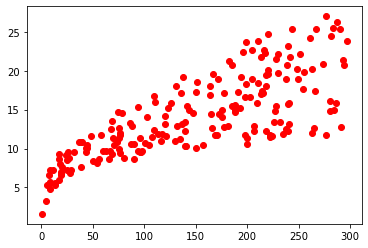

In [10]:
#5. Visualize the relationship between the features and the dependent variable using scatterplots
import matplotlib.pyplot as plt
plt.scatter(df.TV,df.Sales,color="red")

In [13]:
#6. Prepare X (feature variables) and y (response variable)
print("X -VARIABLE \n",df['TV'])
print("Y -VARIABLE \n",df['Sales'])

X -VARIABLE 
 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
Y -VARIABLE 
 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [47]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train,y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(df[['TV']],df['Sales'],test_size=0.2,random_state=42)

In [48]:
#8. Print the shape of train data and test data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(100, 1)
(100, 1)
(100,)
(100,)


In [52]:
#y_train = y_train.reshape(-1, 1)

In [53]:
#9. Perform Linear Regression (on train data) without using any library and print the coefficients values
import numpy as np

# Assuming x_train and y_train are Pandas Series, convert them to NumPy arrays
X = x_train.values.flatten()  # Convert (160,1) to (160,)
Y = y_train.values.flatten()

# Calculate the necessary summations
n = len(X)  # Number of data points
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_XY = np.sum(X * Y)
sum_X2 = np.sum(X ** 2)

# Compute slope (m) and intercept (b)
m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X2 - sum_X ** 2)
b = (sum_Y - m * sum_X) / n

# Print the results
print(f"Computed Coefficients:")
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Computed Coefficients:
Slope (m): 0.08677307916922247
Intercept (b): 122.49874562228815


In [69]:
#10.Create the model using the calculated coefficients and make predictions on the testing set
#x_test = x_test.squeeze()  # Convert DataFrame to Series if necessary

# Compute predictions using the manually derived equation
y_test_pred = m * x_test + b  # Apply the equation y = mX + b

# Print the first few predictions
print("Predictions on test data:")
print(y_test_pred.head())

Predictions on test data:
4      123.618118
32     123.331767
142    124.242885
145    123.392508
109    124.216853
Name: Sales, dtype: float64


In [70]:
#y_pre=model.predict(x_test)

In [73]:
#11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


In [76]:
#12.Print the intercept and coefficients
print(model.coef_)
print(model.intercept_)
y_pred=model.predict(x_train)
print(y_pred)

[[0.08677308]]
[122.49874562]
[[138.18731834]
 [130.93308892]
 [141.63220958]
 [134.67300863]
 [144.66059004]
 [130.84631584]
 [128.23444616]
 [143.26354347]
 [137.74477563]
 [143.33296193]
 [124.05198374]
 [142.46523114]
 [147.10759087]
 [137.36297408]
 [139.77526568]
 [133.18051167]
 [133.8746963 ]
 [124.67674991]
 [136.68614407]
 [144.08788772]
 [140.07029415]
 [123.63547296]
 [122.85451525]
 [130.64673776]
 [145.31138814]
 [142.3090396 ]
 [144.52175312]
 [143.60195848]
 [143.30693001]
 [142.28300767]
 [141.18966688]
 [143.31560731]
 [131.81817433]
 [138.79472989]
 [140.4520957 ]
 [126.22998803]
 [135.64486712]
 [134.46475324]
 [138.34350988]
 [141.57146842]
 [136.08740982]
 [146.50885663]
 [140.28722685]
 [128.30386462]
 [129.12820887]
 [130.8029293 ]
 [132.92886974]
 [142.0921069 ]
 [124.98045569]
 [128.43402424]
 [144.05317849]
 [141.45866342]
 [132.02642972]
 [123.2449941 ]
 [130.95912084]
 [140.7818334 ]
 [136.77291715]
 [145.51096622]
 [146.9166901 ]
 [124.82426414]
 [146.5262

In [78]:
x_train = x_train.values.reshape(-1, 1)  # Convert to 2D
x_test = x_test.values.reshape(-1, 1)    # Convert to 2D

In [1]:
#13.Make predictions on the testing set - y_pred
y_pre=model.predict(x_test)

NameError: name 'model' is not defined

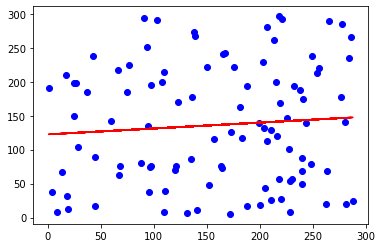

In [83]:
#14.Plot train data and the model
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train,y_pred,color="red") 

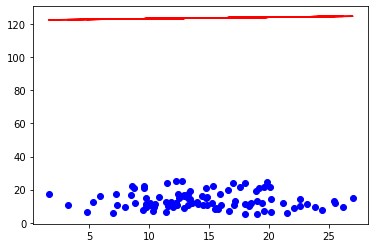

In [86]:
#15.Plot test data and the model
plt.scatter(x_test, y_test, color='blue', label='Training Data')
plt.plot(x_test,y_pre,color="red") 

In [90]:
#16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = m * x_train + b  # Using manually computed coefficients
#print(y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

# Compute R Squared (R²) Score
r2 = r2_score(y_train, y_train_pred)
r22=r2_score(y_test,y_pre)
# Print results
print("Mean Squared Error (MSE):", mse)
print("R Squared Value (R²):", r2)

Mean Squared Error (MSE): 7662.274253395801
R Squared Value (R²): 0.006560439721265632


In [91]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
def adjust(r2,n,p):
    return 1-((1-r2)*(n-1)/(n-p-1))
p=x_train.shape[1]
print(p)
n1=x_train.shape[0]
n2=x_test.shape[0]
n=n1+n2
print(n)
a=adjust(r2,n,p)
b=adjust(r22,n,p)
print(a)
print(b)

1
200
0.0015430682047062882
-466.93179892242915
